In [1]:
import tsyganenko as tsyg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from spacepy import coordinates as coord
import spacepy.time as spt
from spacepy.time import Ticktock
import datetime as dt
from mpl_toolkits.mplot3d import Axes3D
import sys
earth_radius_ax = 1.5*6371 #km
#adding the year data here so I don't have to crush my github repo
pathname = '../../data-se3-path-planner/yearData/batch2019/'
# pathname = '../../batch2019/'
sys.path.append(pathname)

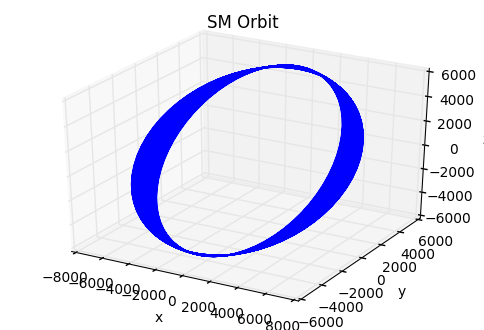

In [2]:
df = pd.read_csv(pathname+'Jan55_results.csv')
# df = pd.read_csv(pathname+'65_year.csv')
# df = pd.read_csv(pathname+'Jan65.csv')
# df = pd.read_csv(pathname+'Jan80.csv')
# df = pd.read_csv(pathname+'Jul65.csv')
# df = pd.read_csv(pathname+'Jul90.csv')
GMAT_MJD_OFFSET = 29999.5
t = df['DefaultSC.A1ModJulian'] + GMAT_MJD_OFFSET
x = df['DefaultSC.gse.X']
y = df['DefaultSC.gse.Y']
z = df['DefaultSC.gse.Z']

spacecraft = coord.Coords([[i,j,k] for i,j,k in zip(x,y,z)], 'GSE', 'car')
spacecraft.ticks = Ticktock(t,'MJD')
# spacecraft = spacecraft.convert('SM','car')
points = 5000
# this figure validates what I already expected
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(spacecraft.x[:points],spacecraft.y[:points],spacecraft.z[:points])
plt.title('SM Orbit')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

# okay i've looked at a couple of orbits from the GSE point of view and
# i now think that it's okay for a zero inclined orbit WRT to the earth
# equator to be inclined WRT to the ecliptic, but like holy moley
# these orbits are confusing sometimes.


psi is [-0.35086542 -0.35019092 -0.34913625 ...,  0.1214148   0.12256567
  0.12319252]
type(phi_c) False
the quantity is a vector
x equals to [ -603.05296596  -598.49629276  -591.35923984 ...,  2155.43121893
  2156.88474319  2157.7688434 ]
y equals to [ 0.  0.  0. ...,  0.  0.  0.]
sum of the y vector 0.0
z equals to [ -328.22855143  -324.51079297  -318.74765486 ...,  1199.58581871
  1208.27630658  1212.91361435]


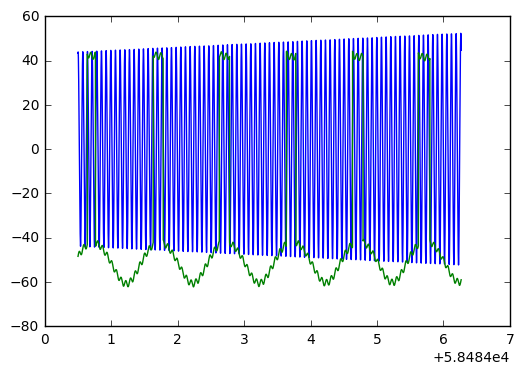

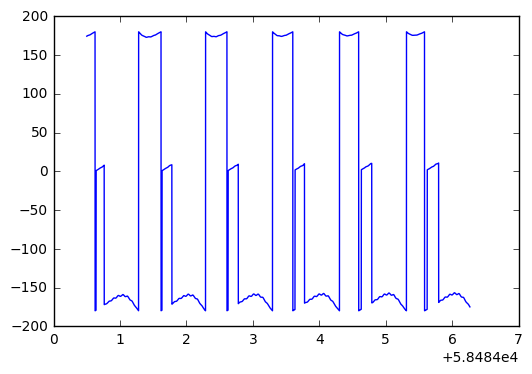

In [3]:
spacecraft_sph = spacecraft.convert('GSE','sph')

xc,yc,zc = tsyg.orbitalCuspLocation(spacecraft,t)
cusp_location = coord.Coords([[i,j,k] for i,j,k in zip(xc,yc,zc)], 'SM', 'car')
cusp_location.ticks = Ticktock(t,'MJD')
cusp_location_gse_sph = cusp_location.convert('GSE','sph')


plt.plot(spacecraft_sph.ticks.MJD[:points], spacecraft_sph.lati[:points])
plt.plot(cusp_location_gse_sph.ticks.MJD[:points], cusp_location_gse_sph.lati[:points])
plt.show()
# plt.plot(spacecraft_sph.ticks.MJD[:points], spacecraft_sph.long[:points])
plt.plot(cusp_location_gse_sph.ticks.MJD[:points], cusp_location_gse_sph.long[:points])
plt.show()

So the Main issue seems to BE that the cusp location is a step function occasionally.  Let's look at the domain and range of the original tsyganenko to see if there are points where the function is undefined or if there are points where weird stuff is happening.  The basic idea at this point, is to see if there are interesting things going on with the cusp phi function.

So what I've noticed is the sign FLIPS when the function goes to $\pm 180$ degrees in the longitude.  It also retains this property for the 1/sin and 1/arcsin versions of the tsyganenko model.  So my next thought is that the coordinate transform is what's causing the discontinuity.  